# Exploratory Data Analysis(EDA): Python
**Learning the basics of Exploratory Data Analysis using Python with Numpy, Matplotlib, and Pandas**.
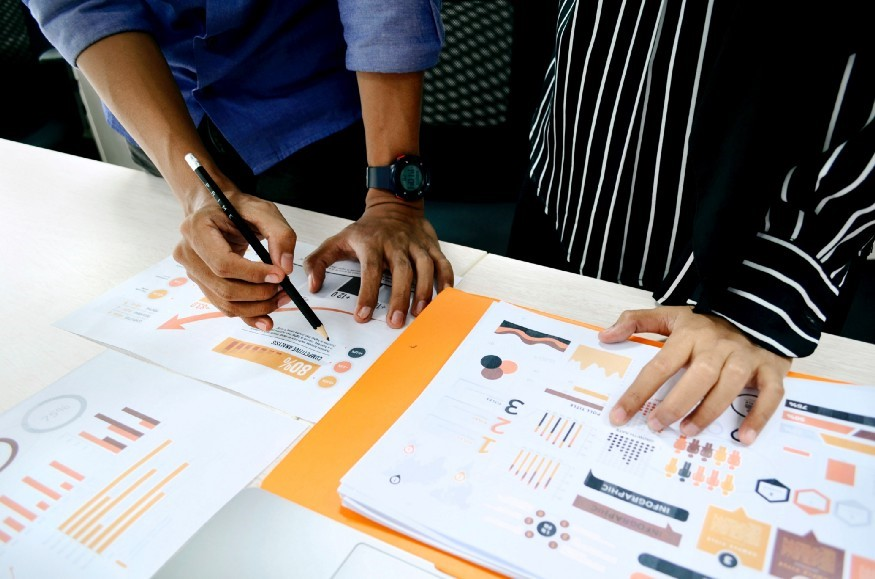

**What is Exploratory Data Analysis(EDA)?**

If we want to explain EDA in simple terms, it means trying to understand the given data much better, so that we can make some sense out of it.
We can find a more formal definition in Wikipedia.

*In statistics, **exploratory data analysis** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.*

EDA in Python uses data visualization to draw meaningful patterns and insights. It also involves the preparation of data sets for analysis by removing irregularities in the data.
Based on the results of EDA, companies also make business decisions, which can have repercussions later.



*    If EDA is not done properly then it can hamper the further steps in the machine learning model building process.
*   If done well, it may improve the efficacy of everything we do next.



In this exercise we’ll see about the following topics:

1.	Data Sourcing
2.	Data Cleaning
3.	Univariate analysis
4.	Bivariate analysis
5.	Multivariate analysis


1. **Data Sourcing**

Data Sourcing is the process of finding and loading the data into our system. Broadly there are two ways in which we can find data.

1.	Private Data
2.	Public Data

**Private Data**

As the name suggests, private data is given by private organizations. There are some security and privacy concerns attached to it. This type of data is used for mainly organizations internal analysis.

**Public Data**

This type of Data is available to everyone. We can find this in government websites and public organizations etc. Anyone can access this data, we do not need any special permissions or approval.

We can get public data on the following sites.

*   https://data.gov
*   https://data.gov.uk
*   https://data.gov.in
*   https://www.kaggle.com/
*   https://archive.ics.uci.edu/ml/index.php
*   https://github.com/awesomedata/awesome-public-datasets

The very first step of EDA is Data Sourcing, we have seen how we can access data and load into our system. Now, the next step is how to clean the data.


2. **Data Cleaning**

After completing the Data Sourcing, the next step in the process of EDA is **Data Cleaning**. It is very important to get rid of the irregularities and clean the data after sourcing it into our system.

Irregularities are of different types of data.



*   Missing Values
*   Incorrect Format
*   Incorrect Headers
*   Anomalies/Outliers

To perform the data cleaning we are using a sample data set, which can be found in this file `"Marketing_Analysis.csv"`.

We are using **Jupyter Notebook** for analysis.

First, let’s import the necessary libraries and store the data in our system for analysis.

Now, the data set looks like this,


In [1]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Read the data set of "Marketing Analysis" in data.
df= pd.read_csv('C:/Users/steff/datamining/EDA2/Marketing_Analysis.csv', skiprows=2)

# Printing the data
df.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


If we observe the above dataset, there are some discrepancies in the Column header for the first 2 rows. 
The correct data is from the index number 1. So, we have to fix the first two rows.

This is called **Fixing the Rows and Columns**. Let’s ignore the first two rows and load the data again.

FIX YOUR DATA


In [2]:
# Read the file in data without first two rows as it is of no use
#Already done it during the reading

Dataset after fixing the rows and columns

In [3]:
#print the head of the data frame.
df.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


Following are the steps to be taken while **Fixing Rows and Columns**:



1.   Delete Summary Rows and Columns in the Dataset.
1.   Delete Header and Footer Rows on every page.
1.   Delete Extra Rows like blank rows, page numbers, etc.
2.   We can merge different columns if it makes for better understanding of the data
2.   Similarly, we can also split one column into multiple columns based on our requirements or understanding.
2.   Add Column names, it is very important to have column names to the dataset.

Now if we observe the above dataset, the `customerid` column has of no importance to our analysis, and also the `jobedu` column has both the information of `job` and `education` in it.

So, what we’ll do is, we’ll drop the `customerid` column and we’ll split the `jobedu` column into two other columns `job` and `education` and after that, we’ll drop the jobedu column as well




In [4]:
#Write your code here
# Drop the customer id as it is of no use.
df=df.drop("customerid", axis=1)
#Extract job  & Education in newly from "jobedu" column.
df['job']= df["jobedu"].apply(lambda x: x.split(",")[0])
df['education']= df["jobedu"].apply(lambda x: x.split(",")[1])
# Drop the "jobedu" column from the dataframe.
df=df.drop("jobedu", axis=1)
# Printing the Dataset
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


**Missing Values**

If there are missing values in the Dataset before doing any statistical analysis, we need to handle those missing values.

There are mainly three types of missing values.

1.	MCAR(Missing completely at random): These values do not depend on any other features.
2.	MAR(Missing at random): These values may be dependent on some other features.
3.	MNAR(Missing not at random): These missing values have some reason for why they are missing.

Let’s see which columns have missing values in the dataset.

In [5]:
# Checking the missing values (How many?)
# Checking the missing values
print(df.isnull().sum())

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64


Let’s see how to handle the missing values. We can handle missing values by dropping the missing records or by imputing the values.

**Drop the missing Values**

Let’s handle missing values in the `age` column. DROP IT

In [6]:
# Dropping the records with age missing in data dataframe.
df=df.dropna(subset=['age'])

# Checking the missing values in the dataset.
print(df.isnull().sum())

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64


Let’s impute values to the missing values for the `month` column.

Since the `month` column is of an object type, let’s calculate the mode of that column and impute those values to the missing values.


In [7]:
# Find the mode of month in data
month_mode = df.month.mode()[0]
# Fill the missing values with mode value of month in data.
df.month.fillna(month_mode, inplace = True)
# Let's see the null values in the month column.
df.month.isnull().sum()

0

Handling the missing values in the `Response` column. Since, our target column is `Response` Column, if we impute the values to this column it’ll affect our analysis. 

So, it is better to drop the missing values from `Response` Column.

In [8]:
#drop the records with response missing in data.
df=df.dropna(subset=['response'])

# Calculate the missing values in each column of data frame
df.isnull().sum()


age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

Let’s check whether the missing values in the dataset have been handled or not,

In [9]:
# Checking the missing values in the dataset.
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

We can also, fill the missing values as **‘NaN’** so that while doing any statistical analysis, it won’t affect the outcome.

**Handling Outliers**

We have seen how to fix missing values, now let’s see how to handle outliers in the dataset.

***Outliers are the values that are far beyond the next nearest data points.***

There are two types of outliers:



1.  **Univariate outliers**: Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.

2.	**Multivariate outliers**: While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value.

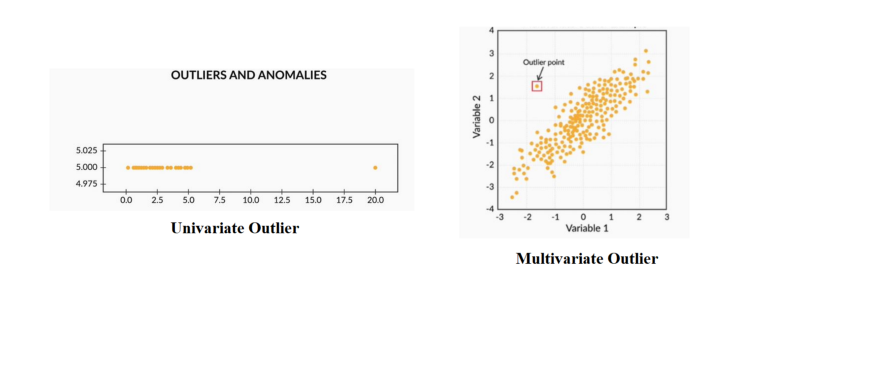

So, after understanding the causes of these outliers, we can handle them by dropping those records or imputing with the values or leaving them as is, if it makes more sense.



**Standardizing Values**

To perform data analysis on a set of values, we have to make sure the values in the same column should be on the same scale. For example, if the data contains the values of the top speed of different companies’ cars, then the whole column should be either in meters/sec scale or miles/sec scale.

Now, that we are clear on how to source and clean the data, let’s see how we can analyze the data.


**3. Univariate Analysis**

If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

**Categorical Unordered Univariate Analysis:**

An unordered variable is a categorical variable that has no defined order. If we take our data as an example, the **job** column in the dataset is divided into many sub-categories like technician, blue-collar, services, management, etc. There is no weight or measure given to any value in the **‘job’** column.

Now, let’s analyze the job category by using plots. Since Job is a category, we will plot the bar plot.

The output looks like this,
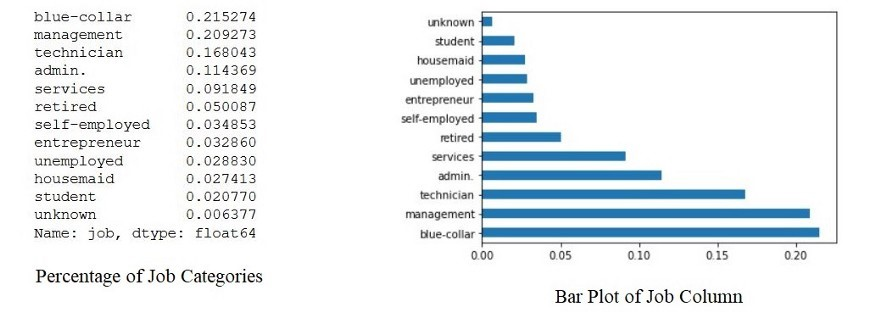

**What is normalization?**

***Normalization*** *refers to rescaling real-valued numeric attributes into a 0 to 1 range*. Data normalization is used in machine learning to make model training less sensitive to the scale of features. This allows our model to converge to better weights and, in turn, leads to a more accurate model

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64


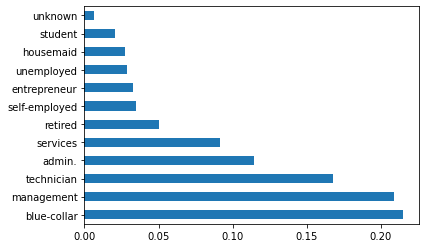

In [16]:
#Do your bar plot DO NOT FORGET TO NORMALIZE!
# Let's calculate the percentage of each job status category.
df.job.value_counts(normalize=True)
print(df.job.value_counts(normalize=True))
#plot the bar graph of percentage job categories
df.job.value_counts(normalize=True).plot.barh()
plt.show()

What can you infer from the above barplot?
Explain.
That most actual jobs are from blue-collars

WRITE YOUR CONCLUSIONS HERE.
Data normalization helps us to categorize data, that many time are words to numbers

**Categorical Ordered Univariate Analysis:**

Ordered variables are those variables that have a natural rank of order. Some examples of categorical ordered variables from our dataset are:



*   Month: Jan, Feb, March……
*   Education: Primary, Secondary,……

Now, let’s analyze the Education Variable from the dataset. Since we’ve already seen a bar plot, let’s see how a Pie Chart looks like.

The output will be,
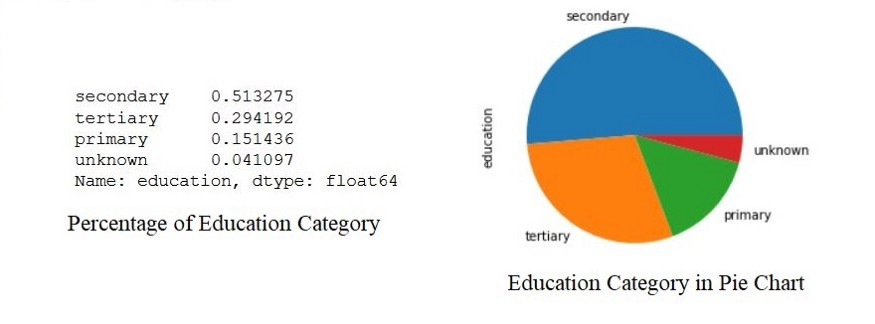

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64


<AxesSubplot:ylabel='education'>

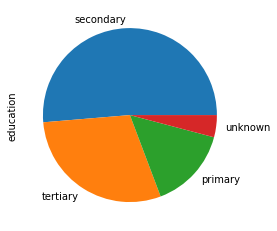

In [17]:
# Do you Pie chart do not forget to NORMALIZE
#calculate the percentage of each education category.
print(df.education.value_counts(normalize=True))

#plot the pie chart of education categories
df.education.value_counts(normalize=True).plot.pie()


What can you infer from the pie chart?

This is how we analyze univariate categorical analysis. If the column or variable is of numerical then we’ll analyze by calculating its mean, median, std, etc. We can get those values by using the describe function.

In [18]:
#Perform a describe on the salary column
df.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

**4. Bivariate Analysis**

If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.

**a) Numeric-Numeric Analysis:**

Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis. We can analyze it in three different ways.



1.   Scatter Plot
2.   Pair Plot
3.   Correlation Matrix

**Scatter Plot**

Let’s take three columns ‘Balance’, ‘Age’ and ‘Salary’ from our dataset and see what we can infer by plotting to scatter plot between `salary` `balance` and `age` `balance`


Now, the scatter plots looks like,
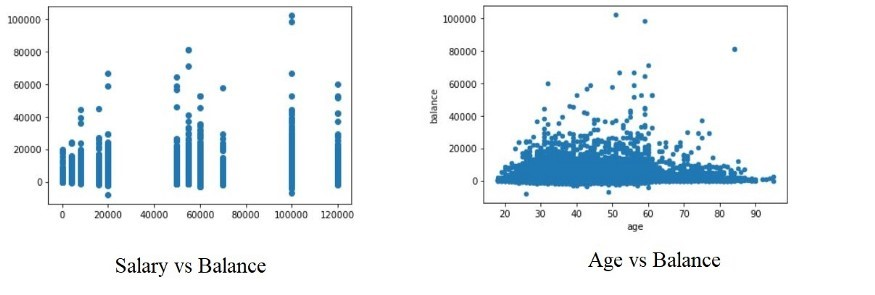

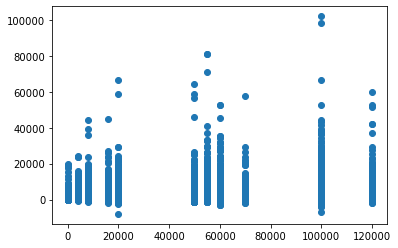

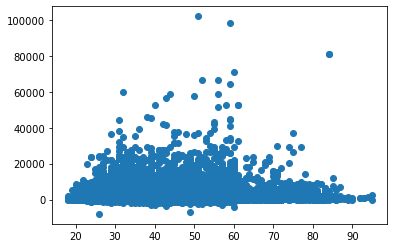

In [22]:
# Do your scatter plots here with those variable comparisons
#plot the scatter plot of balance and salary variable in data
plt.scatter(df.salary,df.balance)
plt.show()
#plot the scatter plot of balance and age variable in data
plt.scatter(df.age,df.balance)
plt.show()

**Pair Plot**

Now, let’s plot Pair Plots for the three columns we used in plotting Scatter plots. We’ll use the seaborn library for plotting Pair Plots.


The Pair Plot looks like this,
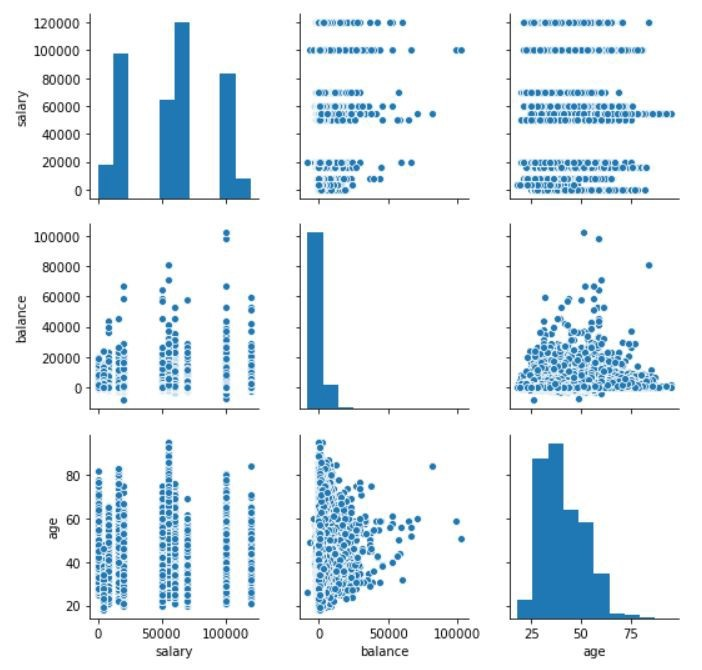

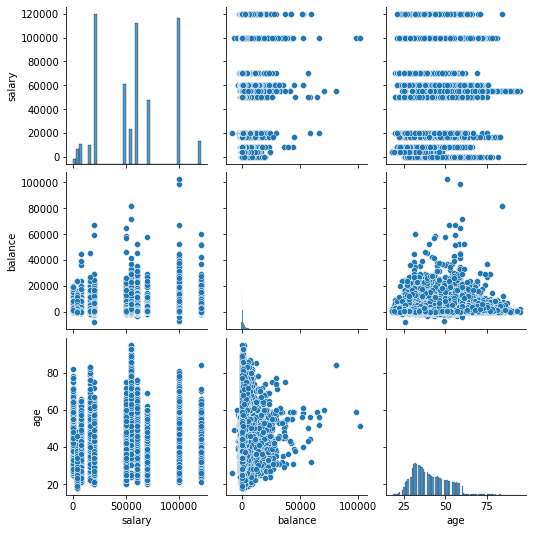

In [26]:
#Use seaborn to to the pair plotting with those 3 columns
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = df, vars=['salary','balance','age'])
plt.show()

**Correlation Matrix**

Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.

First, we created a matrix using age, salary, and balance. After that, we are plotting the heatmap using the seaborn library of the matrix.
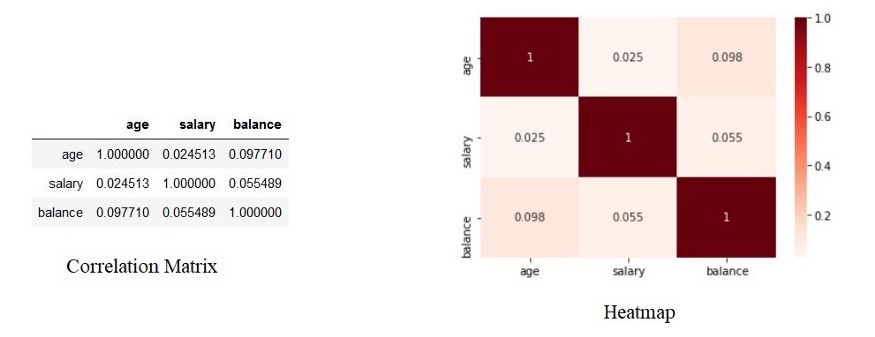

              age    salary   balance
age      1.000000  0.024513  0.097710
salary   0.024513  1.000000  0.055489
balance  0.097710  0.055489  1.000000


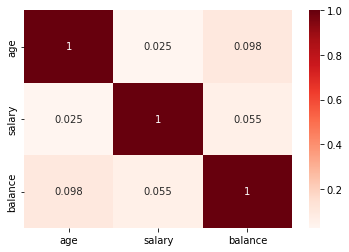

In [29]:
# Do your correlation matrix here
# Creating a matrix using age, salry, balance as rows and columns
print(df[['age','salary','balance']].corr())


#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(df[['age','salary','balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

**b) Numeric - Categorical Analysis**

Analyzing the one numeric variable and one categorical variable from a dataset is known as numeric-categorical analysis. We analyze them mainly using mean, median, and box plots.

Let’s take `salary` and `response` columns from our dataset.

First check for mean value using `groupby`


In [30]:
#groupby the response to find the mean of the salary with response no & yes separately.
df.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

The output will be,
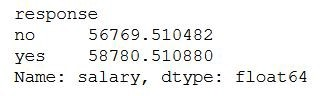

There is not much of a difference between the yes and no response based on the salary.
Let’s calculate the median,


In [32]:
#groupby the response to find the median of the salary with response no & yes separately.
df.groupby('response')['salary'].median()


response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

The output will be,
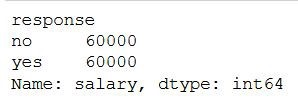

What do the mean and median tell you?
Explain.

WRITE YOUR EXPLANATION HERE
Mean tell you the most common value or the average number/percentage of a group of values.
And the median divides all the data, showing the distances or difference between each value

Let’s plot the box plot for them and check the behavior.

C:\Users\steff\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


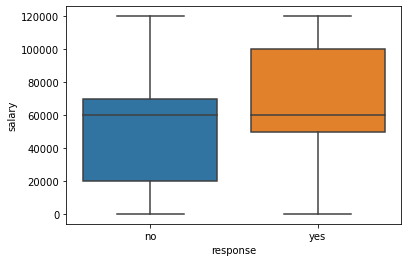

In [33]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(df.response, df.salary)
plt.show()

The box plot looks like this,
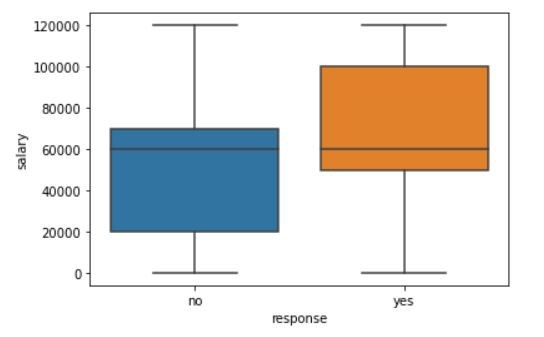

What does the Box Plot tells you?
Explain.

EXPLAIN HERE!!!
Shows you where is the most concentrated values and the different quartiles and the mean

This is how we analyze Numeric-Categorical variables, we use mean, median, and Box Plots to draw some sort of conclusions.

**c) Categorical — Categorical Analysis**

Since our target variable/column is the Response rate, we’ll see how the different categories like Education, Marital Status, etc., are associated with the Response column. So instead of ‘Yes’ and ‘No’ we will convert them into ‘1’ and ‘0’, by doing that we’ll get the “Response Rate”.

The output looks like this,
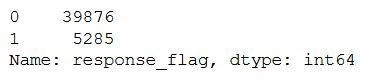

In [34]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
df['response_rate'] = np.where(df.response=='yes',1,0)
df.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

Let’s see how the response rate varies for different categories in marital status.

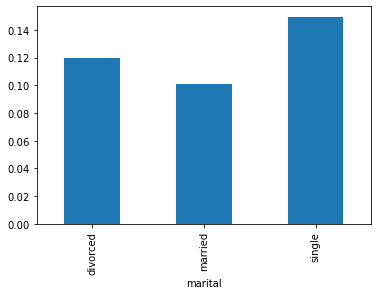

In [35]:
#plot the bar graph of marital status with average value of response_rate
df.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()


The graph looks like this,
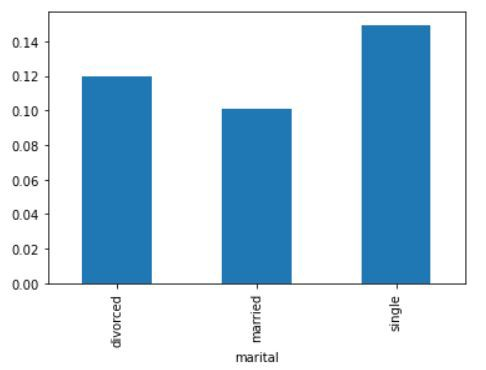

By the above graph, we can infer that the positive response is....... 
WRITE YOUR CONCLUSIONS.

Similarly, we can plot the graphs for Loan vs Response rate, Housing Loans vs Response rate, etc.
DO THIS ADDITIONAL ANALYSIS

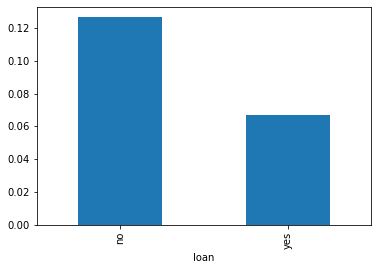

In [36]:
#plot the bar graph of loan with average value of response_rate
df.groupby('loan')['response_rate'].mean().plot.bar()
plt.show()

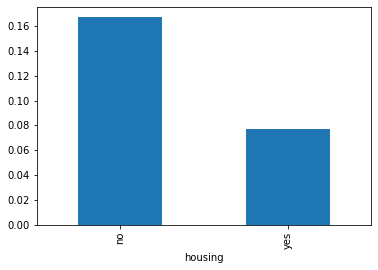

In [37]:
#plot the bar graph of housing loans with average value of response_rate
df.groupby('housing')['response_rate'].mean().plot.bar()
plt.show()

**5. Multivariate Analysis**

If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

Let’s see how **‘Education’**, **‘Marital’**, and **‘Response_rate’** vary with each other.

First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


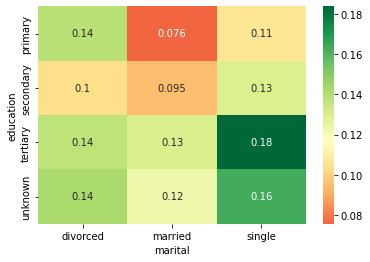

In [39]:
#Write your code here HINT (Create a PIVOT using those 3 columns)
result = pd.pivot_table(data=df, index='education', columns='marital',values='response_rate')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

The Pivot table and heatmap looks like this,
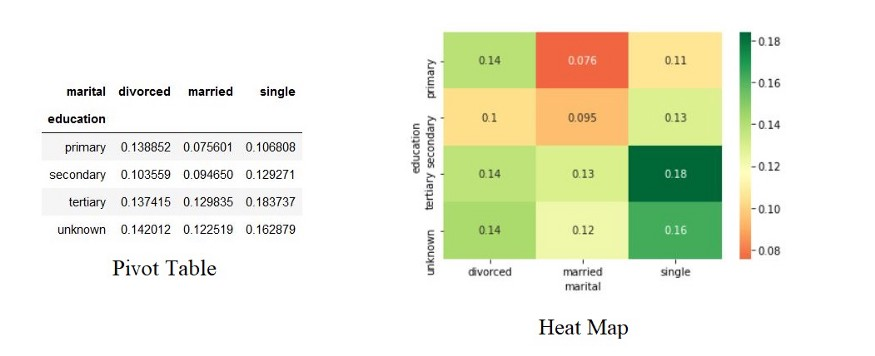

Based on the Heatmap we can infer ... WRITE YOUR CONCLUSIONS.
That is more often seen single people on higher levels of study

Similarly, we can plot the graphs for Job vs marital vs response, Education vs poutcome vs response, etc.

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879
marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


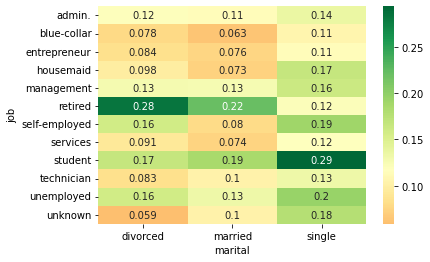

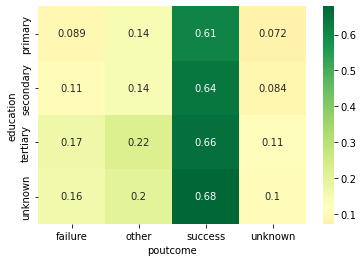

In [40]:
#Write your code here HINT (Create a PIVOT using those 3 columns)
result1 = pd.pivot_table(data=df, index='job', columns='marital',values='response_rate')
print(result)

result2 = pd.pivot_table(data=df, index='education', columns='poutcome',values='response_rate')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result1, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()
sns.heatmap(result2, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

**Conclusion**

This is how we’ll do Exploratory Data Analysis. Exploratory Data Analysis (EDA) helps us to look beyond the data. The more we explore the data, the more the insights we draw from it. As a data analyst, almost 80% of our time will be spent understanding data and solving various business problems through EDA.

**Thank you for reading and Happy Coding!!!**

References

Exploratory data analysis: https://en.wikipedia.org/wiki/Exploratory_data_analysis

Python Exploratory Data Analysis: https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python

Exploratory Data Analysis using Python: https://www.activestate.com/blog/exploratory-data-analysis-using-python/

Univariate and Multivariate Outliers: https://www.statisticssolutions.com/univariate-and-multivariate-outliers/